BRIEF:

By running this code with the given dataset, you can uncover associations and patterns within the transaction data. These findings can be valuable for various applications, including market basket analysis, recommendation systems, and targeted marketing strategies. The insights gained from the frequent itemsets and association rules can help businesses understand customer behavior, improve product recommendations, optimize inventory management, and develop targeted marketing campaigns to enhance customer satisfaction and increase profitability.


The purpose of the provided code is to analyze a transaction dataset using Tensorflow and mine association rules. The dataset contains information about transactions recorded over a specific period of time and includes various attributes such as transaction date, transaction amount, merchant name, category, location, age, gender, employment status, marital status, and product.

The code performs the following steps:

Loading the transaction dataset from a CSV file: The code reads the dataset from a CSV file, which contains information about each transaction.

Preprocessing the transaction data: The transaction data is preprocessed to ensure it is in a suitable format for analysis. This step involves cleaning the data, handling missing values, and transforming the data into a format that can be used by the Apriori algorithm.

Applying the Apriori algorithm: The code utilizes the Apriori algorithm to identify frequent itemsets from the transaction data. Frequent itemsets are sets of items (in this case, transaction categories) that appear together frequently in the transactions. The algorithm scans the dataset multiple times, gradually increasing the itemset size to find the most frequent itemsets.

Generating association rules: From the frequent itemsets, the code generates association rules. Association rules reveal relationships between different transaction categories and provide insights into potential purchasing patterns. These rules consist of an antecedent (a set of items/categories) and a consequent (another item/category). The rules indicate that if the antecedent is present in a transaction, the consequent is likely to be present as well.

Printing the discovered frequent itemsets and association rules: The code outputs the discovered frequent itemsets and association rules. This information can be analyzed and interpreted to understand the relationships between different transaction categories. For example, it can reveal which categories frequently co-occur in transactions or which categories are associated with specific merchants.

Import the necessary modules and functions (os, pandas, TransactionEncoder, apriori, association_rules) for data processing and association rule mining.


Import the necessary modules and functions (os, pandas, TransactionEncoder, apriori, association_rules) for data processing and association rule mining.


In [11]:
import os
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from IPython.display import display, FileLink
import matplotlib.pyplot as plt


Get the current working directory using os.getcwd().


In [2]:
# Step 1: Get the current working directory
current_directory = os.getcwd()


Join the current directory path with the CSV file name to create the file path.


In [3]:
#Step 2: The code below is used to get custom data that have been uploaded. This file is linked using google drive.
csv_file_path = os.path.join(current_directory, 'market_basket_analysis.csv')


Load the CSV file using Pandas and store the data in the transaction_data variable.


In [4]:
# Step 3: Load the CSV file using Pandas
transaction_data = pd.read_csv(csv_file_path)
transaction_data.info

<bound method DataFrame.info of     transaction_date transaction_amount merchant_name      category  \
0                  1           6/6/2023           100       Walmart   
1                  2           6/6/2023            50     Starbucks   
2                  3           6/6/2023            20       Netflix   
3                  4           6/6/2023            10   Gas Station   
4                  5           6/6/2023            30        Amazon   
5                  6           6/7/2023            80     Carrefour   
6                  7           6/7/2023            15  Cafe Delight   
7                  8           6/7/2023            50       Netflix   
8                  9           6/7/2023            15   Gas Station   
9                 10           6/7/2023            25        Amazon   
10                11                ...           ...           ...   
11                12           6/6/2023           100       Walmart   
12                13           6/6/2023      


Convert the transaction data to a list format using .values.tolist(). This step prepares the data for further processing.


In [5]:
# Step 4: Preprocess the transaction data
transaction_list = transaction_data.values.tolist()


Convert each item in the transaction data to a string format. This is necessary to ensure all items are in a consistent format for the TransactionEncoder to handle.


In [6]:
# Step 5: Convert the transaction data to a string format
transaction_list = [[str(item) for item in transaction] for transaction in transaction_list]


Create an instance of TransactionEncoder and encode the transaction data into a binary matrix using te.fit_transform(). This step transforms the transaction data into a format suitable for the Apriori algorithm.


In [7]:
# Step 6: Encode the transaction data into a binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(transaction_list)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)


Apply the Apriori algorithm to find frequent itemsets using apriori(). Specify the minimum support threshold (min_support) and set use_colnames=True to use column names from the transaction data.

In [8]:
# Step 7: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.1, use_colnames=True)


Generate association rules from the frequent itemsets using association_rules(). Specify the desired metric for rule evaluation (metric) and set the minimum threshold for the metric (min_threshold).

In [9]:
# Step 8: Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

Print the frequent itemsets using print(frequent_itemsets).

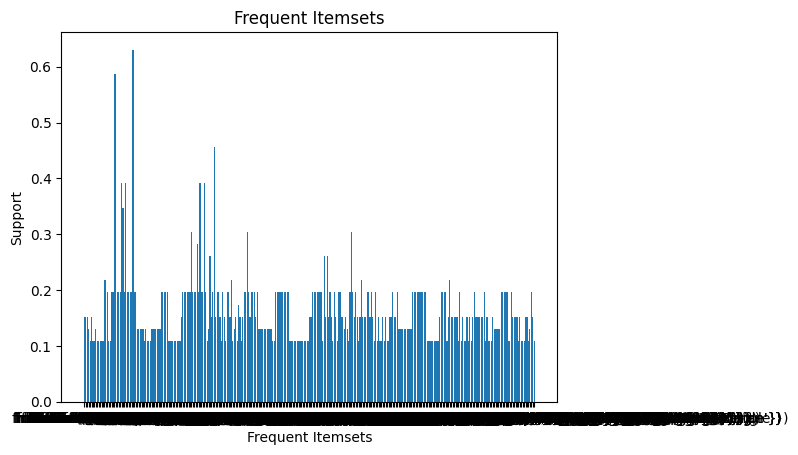

Frequent Itemsets:


,support,itemsets
0,0.152174,(10)
1,0.152174,(15)
2,0.152174,(20)
3,0.130435,(25)
4,0.108696,(28)
...,...,...
311,0.108696,"(Married, Male, Gas, Nakuru, Gas Station)"
312,0.130435,"(10, Employed, Nakuru, Male, Gas, Gas Station)"
313,0.195652,"(Eldoret, Shopping, Amazon, Female, Student, S..."
314,0.152174,"(Employed, Netflix, Nairobi, Female, Streaming..."


In [14]:
# Step 9: Print the frequent itemsets and association rules

# Create a bar plot of the frequent itemsets
plt.bar(range(len(frequent_itemsets)), frequent_itemsets['support'], tick_label=frequent_itemsets['itemsets'])
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets')

# Show the plot
plt.show()

#print the data received
print("Frequent Itemsets:")
display(frequent_itemsets)

Print the association rules using print(rules).

In [15]:
print("\nAssociation Rules:")
display(rules)


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10),(Employed),0.152174,0.586957,0.130435,0.857143,1.460317,0.041115,2.891304
1,(10),(Gas),0.152174,0.195652,0.130435,0.857143,4.380952,0.100662,5.630435
2,(10),(Gas Station),0.152174,0.195652,0.130435,0.857143,4.380952,0.100662,5.630435
3,(10),(Male),0.152174,0.391304,0.130435,0.857143,2.190476,0.070888,4.260870
4,(10),(Nakuru),0.152174,0.195652,0.130435,0.857143,4.380952,0.100662,5.630435
...,...,...,...,...,...,...,...,...,...
1778,"(Male, Nakuru)","(Employed, Married, Gas, Gas Station)",0.152174,0.108696,0.108696,0.714286,6.571429,0.092155,3.119565
1779,"(Married, Gas)","(Employed, Male, Nakuru, Gas Station)",0.108696,0.152174,0.108696,1.000000,6.571429,0.092155,inf
1780,"(Married, Gas Station)","(Employed, Gas, Male, Nakuru)",0.108696,0.152174,0.108696,1.000000,6.571429,0.092155,inf
1781,"(Male, Gas)","(Employed, Married, Nakuru, Gas Station)",0.152174,0.108696,0.108696,0.714286,6.571429,0.092155,3.119565


Export the data into an excel sheet

In [ ]:
# Export the association rules DataFrame to an Excel file
output_file = 'output.xlsx'
rules.to_excel(output_file, index=False)

# Display a download link for the Excel file

In [ ]:
display(FileLink(output_file))
#Not working yet, opening a new tab on browser but link is localhost.
#Incomplete

/content/output.xlsx